In [1]:
import numpy
import py_entropy
from matplotlib import pyplot
import os

from tqdm.notebook import tqdm

pyplot.rcParams.update({
  "text.usetex": True,
  "font.family": "Helvetica"
})

In [2]:
output_dir = "merge_single_double_filling"

os.makedirs(output_dir, exist_ok=True)

In [7]:
t = 10000
ne = 1000
n = 50

In [ ]:
s = py_entropy.MultiDefectState([[0]], numpy.array([1.0], dtype=numpy.complex128), n, 1, num_experiments=ne)
single_purities = s.apply_alternative_layers_and_save_mean_purity(t)

In [ ]:
s = py_entropy.MultiDefectState([[0,1]], numpy.array([1.0], dtype=numpy.complex128), n, 2, num_experiments=ne)
left_purities = s.apply_alternative_layers_and_save_mean_purity(t)

In [ ]:
s = py_entropy.MultiDefectState([[0,n-1]], numpy.array([1.0], dtype=numpy.complex128), n, 2, num_experiments=ne)
sep_purities = s.apply_alternative_layers_and_save_mean_purity(t)

In [15]:
s = py_entropy.MultiDefectState([[0,1,2]], numpy.array([1.0], dtype=numpy.complex128), n, 3, num_experiments=ne)
three_left_purities = s.apply_alternative_layers_and_save_mean_purity(t)

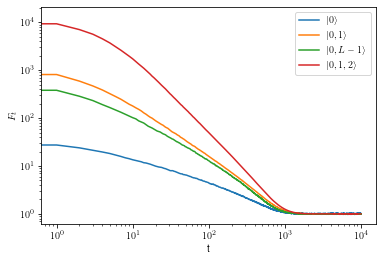

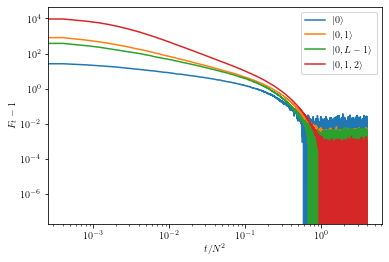

In [16]:
purities = [single_purities, left_purities, sep_purities, three_left_purities]
labels = [r'$\vert 0 \rangle$', r'$\vert 0, 1 \rangle$', r'$\vert 0, L-1 \rangle$', r'$\vert 0,1,2 \rangle$']

for label, purity in zip(labels, purities):
    pyplot.plot(purity, label=label)
    
pyplot.xlabel('t')
pyplot.ylabel('$F_t$')
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.legend()
pyplot.show()

# for label, purity in zip(labels, purities):
#     pyplot.plot(purity, label=label)
    
# pyplot.xlabel('t')
# pyplot.ylabel('$F_t$')
# pyplot.yscale('log')
# pyplot.legend()
# pyplot.show()

for label, purity in zip(labels, purities):
    pyplot.plot(numpy.arange(len(purity))/n**2, purity - 1.0, label=label)
    
pyplot.xlabel('$t/N^2$')
pyplot.ylabel('$F_t - 1$')
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.legend()
pyplot.show()